In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
random.randint(40,95) # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

92

In [8]:
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# data

In [12]:
# 여자
for female in data[:100:2]:
    print(female, end='  ')
# 남자
print('\n-------------------------------------------------------')
for male in data[1:100:2]:
    print(male, end='  ')

[44, 144]  [61, 147]  [44, 158]  [62, 161]  [55, 140]  [66, 147]  [61, 143]  [66, 168]  [64, 147]  [48, 146]  [43, 152]  [48, 152]  [45, 167]  [70, 159]  [57, 148]  [58, 142]  [66, 149]  [43, 148]  [40, 151]  [63, 144]  [44, 141]  [65, 158]  [41, 168]  [51, 163]  [43, 143]  [40, 145]  [51, 141]  [64, 145]  [54, 144]  [59, 148]  [46, 163]  [59, 153]  [69, 142]  [49, 153]  [44, 160]  [60, 154]  [67, 160]  [43, 147]  [68, 156]  [49, 151]  [64, 166]  [52, 150]  [64, 146]  [47, 154]  [44, 170]  [68, 142]  [44, 147]  [53, 164]  [65, 141]  [51, 161]  
-------------------------------------------------------
[68, 168]  [76, 170]  [93, 162]  [89, 160]  [80, 179]  [70, 163]  [88, 185]  [92, 180]  [79, 187]  [93, 173]  [69, 185]  [91, 189]  [87, 191]  [85, 162]  [89, 193]  [89, 182]  [78, 164]  [89, 163]  [69, 179]  [63, 170]  [76, 176]  [91, 162]  [92, 183]  [92, 195]  [71, 172]  [93, 166]  [83, 160]  [68, 192]  [60, 177]  [68, 184]  [61, 164]  [61, 173]  [92, 185]  [95, 168]  [78, 166]  [62, 165

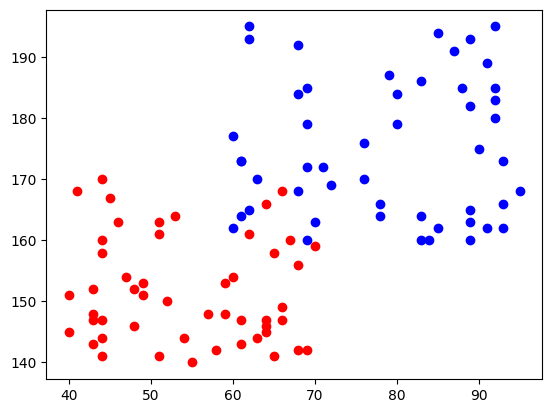

In [21]:
# print('여자 몸무게 : ', [d[0] for d in data[::2]])
# print('여자 키 : ', [d[1] for d in data[::2]])
# print('\n-------------------------------------------------------')
# print('남자 몸무게 : ', [d[0] for d in data[1::2]])
# print('남자 키 : ', [d[1] for d in data[1::2]])
# for d in data[::2]:
#     plt.plot(d[0],d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],
        [d[1] for d in data[1::2]], 'o', color='b')

# 2. 군집합 로직

In [23]:
# 초기 랜점지점 2개
random_points = [[random.randint(40, 95), random.randint(140,195)],
                [random.randint(40, 95), random.randint(140,195)]]
random_points

[[81, 162], [53, 183]]

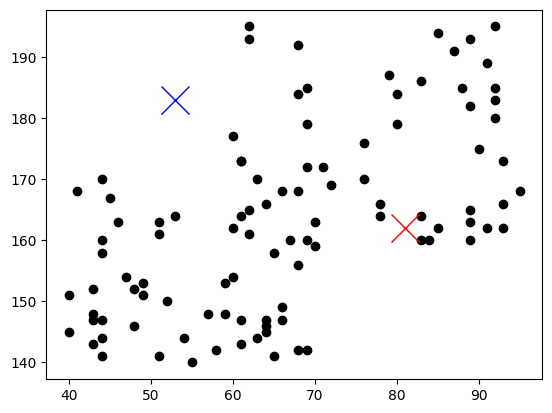

In [29]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 2

In [31]:
# 두 점의 거리를 return a : (0,0) ~ b : (4,3)
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2  + (a[1]-b[1])**2)

In [32]:
a = [0, 0]; b = [4, 3]
dist(a, b)

5.0

In [33]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역
group1 = []  # random_points[0]과 가까운 그룹
group2 = []  # random_points[1]과 가까운 그룹
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d)  # 빨강 X랑 더 가까운 그룹
    else:
        group2.append(d)  # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(69, 31)

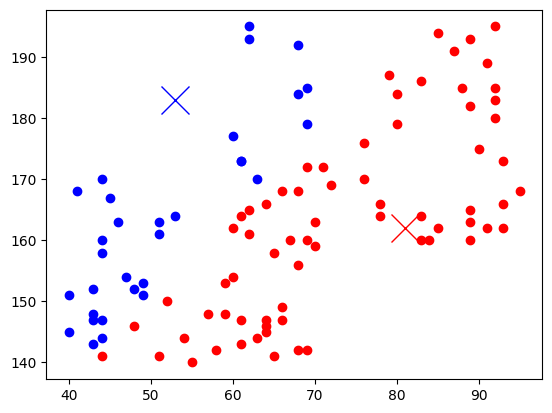

In [35]:
# 새로운 그룹 group1과 group2, 초기 랜덤 지점
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt. plot(random_points[0][0],
         random_points[0][1], 'x', color='r',markersize=20)
plt. plot(random_points[1][0],
         random_points[1][1], 'x', color='b',markersize=20)
plt.show()

In [37]:
# 기준점 이동 group1의 중심점, group2중심점
sumX = 0; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[0] = [sumX/len(group1), sumY/len(group1)]

sumX = 0; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

[[73.27536231884058, 163.07246376811594],
 [51.45161290322581, 163.93548387096774]]

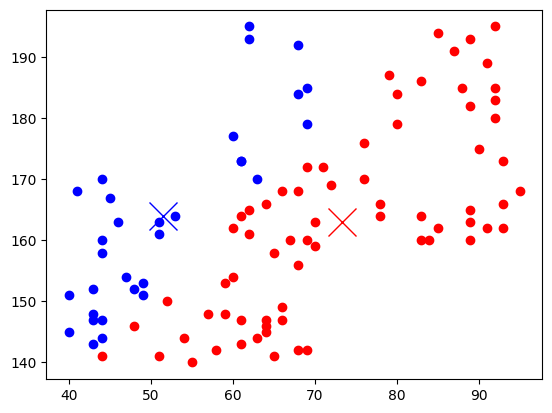

In [38]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt. plot(random_points[0][0],
         random_points[0][1], 'x', color='r',markersize=20)
plt. plot(random_points[1][0],
         random_points[1][1], 'x', color='b',markersize=20)
plt.show()

# 3. 전체 코드 (for문 이용)
- data 생성
- 랜덤포인트2지점
- for문
    - 랜덤포인트 2지점 기준으로 group1과 group2
    - 랜덤포인트 이용(group1 중간점, group2중간점)

초기 points :  [[88, 173], [46, 181]]
1 번쩨 points :  [[79.41304347826087, 172.2391304347826], [54.425925925925924, 159.3148148148148]]
2 번쩨 points :  [[79.23913043478261, 179.84782608695653], [54.574074074074076, 152.83333333333334]]
3 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
4 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
5 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
6 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
7 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
8 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
9 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888888889]]
10 번쩨 points :  [[78.8695652173913, 180.3695652173913], [54.888888888888886, 152.38888888

(140.0, 195.0)

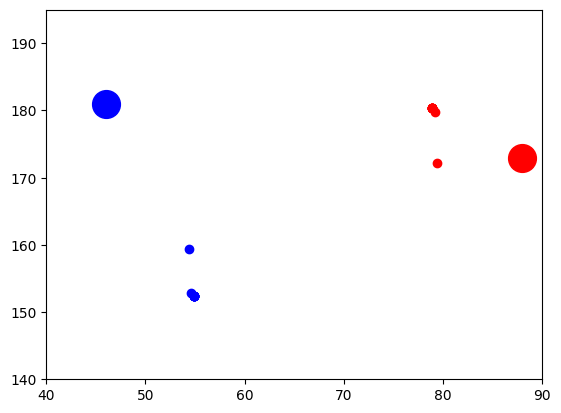

In [43]:
# 데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# point 지정
points = [[random.randint(40,95), random.randint(140,195)],
         [random.randint(40,95), random.randint(140,195)]]
print('초기 points : ', points)
plt.plot(points[0][0], points[0][1], 'o', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', color='b', markersize=20)
# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11):
    group1 = []  # points[0]과 가까운 그룹
    group2 = []  # points[1]과 가까운 그룹
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group1.append(d)
        else:
            group2.append(d)
    # 새로운 포인트로 할당
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    
    sumX = 0; sumY = 0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, '번쩨 points : ', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
plt.xlim([40,90])
plt.ylim([140,195])

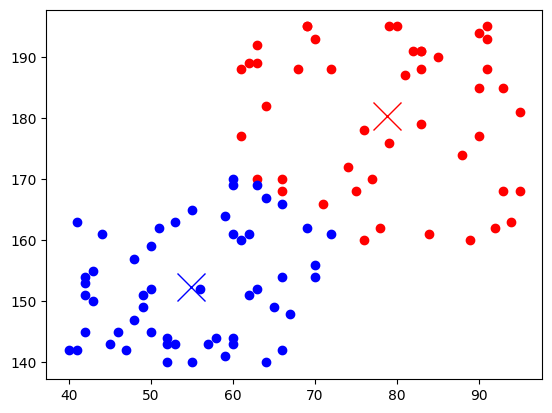

In [45]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)

# 4. API(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측모델 
        ; 분류, 회귀, 군집분석
        fit(학습), predict(예측)
    * 변환모델
        ; 전처리 ex. 스케일조정
        fit(학습), transform(변환함수)

In [46]:
# 군집분석 라이브러리가 joblib 충돌 경고 메세지 출력
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [51]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,  # 2개 그룹으로 나눠
              init='random',  # 초기 중심점 램덤하게
              n_init=10,  # 10번 실행
              random_state=7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [53]:
# 중심점
model.cluster_centers_

array([[ 54.88888889, 152.38888889],
       [ 78.86956522, 180.36956522]])

In [54]:
# 나눠진 그룹들의 인덱스
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [57]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

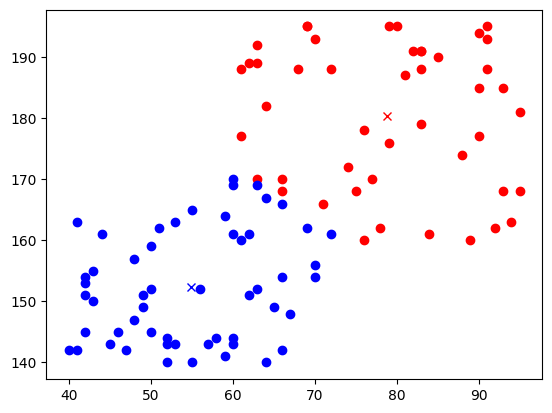

In [61]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(c1[0], c1[1], 'x', color='b') # group1으 중심점
plt.plot(c2[0], c2[1], 'x', color='r') # group2으 중심점